In [2]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

import matplotlib.pyplot as plt
import random
df = pd.read_excel("19B-Data.xlsx", index_col = None, header = 0)
np.random.seed(1234)


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index(df['Date'])
df = df.sort_index()

df.head(10)

,Date,Day,Tripnumber,Time,Time (seconds),Section 1,Section 2,Section 3,Section 4,Section 5,...,Section 271,Section 272,Section 273,Section 274,Section 275,Section 276,Section 277,Section 278,Section 279,Section 280
Date,,,,,,,,,,,,,,,,,,,,,
2013-09-14,2013-09-14,7,40,19:46:00,71160.0,55.455392,34.464058,22.914763,20.653844,19.272294,...,14.015759,18.061401,29.893127,40.216508,51.598981,39.949144,34.960187,38.329171,47.005455,35.964327
2013-09-14,2013-09-14,7,17,11:41:00,42060.0,31.144798,34.526836,13.556825,10.782246,14.263851,...,7.128883,7.035711,6.964976,6.934588,6.990556,7.181893,7.603553,7.603553,9.810431,10.530042
2013-09-14,2013-09-14,7,16,11:36:00,41760.0,29.530072,86.217549,24.295014,20.902268,17.523568,...,8.455494,7.230864,7.025559,7.024659,6.932525,7.164752,7.464298,7.281338,8.087634,8.412247
2013-09-14,2013-09-14,7,15,11:22:00,40920.0,81.392539,51.817233,19.830948,15.828499,21.240740,...,8.512349,7.997109,8.233977,7.911562,7.894500,8.178159,9.097395,10.153804,13.001121,11.483412
2013-09-14,2013-09-14,7,14,09:59:00,35940.0,131.770278,77.048450,36.532608,15.705996,13.412314,...,7.948415,8.120409,9.954884,10.095093,14.193868,19.156945,17.485053,12.714301,19.993471,42.735514
2013-09-14,2013-09-14,7,13,09:49:00,35340.0,39.988480,69.972922,13.767638,10.823104,11.698496,...,7.875423,7.540149,7.540149,7.348233,7.011990,7.754834,7.945542,9.192537,10.950033,14.781718
2013-09-14,2013-09-14,7,12,09:33:00,34380.0,92.809763,20.840710,14.010463,11.453968,18.333412,...,6.942979,6.198417,6.231858,6.330305,7.116493,7.353665,8.086180,9.620298,10.249471,9.378318
2013-09-14,2013-09-14,7,11,09:15:00,33300.0,74.989262,73.100055,17.630913,11.469406,12.353359,...,8.496347,8.515630,8.515630,8.374001,7.972283,7.586007,7.904547,9.143347,9.941037,10.221126
2013-09-14,2013-09-14,7,10,08:53:00,31980.0,28.929373,115.788144,23.241100,17.299410,14.508657,...,9.033902,8.139044,7.883252,7.883252,7.852412,7.821386,7.841114,7.957655,8.494191,8.807409


In [4]:
Day_1 = df[df['Date'] == '2013-09-18']
Day_1 = Day_1.set_index(Day_1['Tripnumber'])
Day_1 = Day_1.sort_index()

In [5]:
Day_Temp = Day_1.copy()
val = (Day_Temp['Time (seconds)'].iloc[0]).copy()
i = 0
Day_Temp['Time (seconds)'] = Day_Temp['Time (seconds)'] - val
Day_Temp

,Date,Day,Tripnumber,Time,Time (seconds),Section 1,Section 2,Section 3,Section 4,Section 5,...,Section 271,Section 272,Section 273,Section 274,Section 275,Section 276,Section 277,Section 278,Section 279,Section 280
Tripnumber,,,,,,,,,,,,,,,,,,,,,
1,2013-09-18,4,1,05:52:00,0.0,28.261265,47.980606,14.362014,10.015118,8.865316,...,8.063147,8.063147,8.063147,8.063147,8.063147,8.063147,8.062569,8.052689,8.798518,13.229189
2,2013-09-18,4,2,06:04:00,720.0,23.984124,58.433909,18.762301,13.220619,13.698792,...,7.082190,6.795519,6.795519,6.890106,7.025882,7.296118,8.082445,10.725990,8.807677,8.196295
3,2013-09-18,4,3,07:07:00,4500.0,23.498411,65.453656,16.336340,11.070093,11.070093,...,7.090285,6.639709,6.122204,5.992631,5.903053,6.635988,6.699204,6.669231,7.463909,8.534870
4,2013-09-18,4,4,07:10:00,4680.0,33.391467,48.500821,23.316675,11.521410,10.114941,...,6.849596,6.508016,6.508016,6.454901,5.712078,6.033804,6.730016,9.031891,9.818946,10.942363
5,2013-09-18,4,5,07:25:00,5580.0,92.285239,2.785230,2.785230,2.785230,3.474958,...,9.056091,32.695193,15.830459,11.193591,14.853182,45.697071,9.973763,9.169613,10.846956,24.415842
6,2013-09-18,4,6,08:34:00,9720.0,33.862882,104.600776,18.913334,13.050388,12.175955,...,17.933932,17.933932,17.933932,17.933932,22.311258,19.638213,20.581520,43.899216,39.196204,23.127533
7,2013-09-18,4,7,08:47:00,10500.0,23.599132,85.940297,19.120087,22.235596,19.786774,...,7.498656,7.110753,6.963114,6.963114,8.796709,9.115120,7.928094,6.949709,8.688517,8.953087
8,2013-09-18,4,8,08:54:00,10920.0,46.484231,82.649772,49.763009,17.784970,19.591702,...,7.708037,6.566352,6.097248,6.306730,6.485283,13.547070,13.561941,13.561941,13.561941,13.561941
9,2013-09-18,4,9,09:48:00,14160.0,37.897323,46.614168,17.517268,12.950132,13.353623,...,11.628366,26.468024,16.807705,10.307304,8.665192,7.921027,7.528148,7.528148,7.373167,7.187297


In [6]:
Day_Temp_only_sections = Day_Temp.copy()
Day_Temp_only_sections = Day_Temp_only_sections.drop("Date", axis=1)
Day_Temp_only_sections = Day_Temp_only_sections.drop("Day", axis=1)
Day_Temp_only_sections = Day_Temp_only_sections.drop("Tripnumber", axis=1)
Day_Temp_only_sections = Day_Temp_only_sections.drop("Time" , axis=1)

Day_Temp_only_sections

,Time (seconds),Section 1,Section 2,Section 3,Section 4,Section 5,Section 6,Section 7,Section 8,Section 9,...,Section 271,Section 272,Section 273,Section 274,Section 275,Section 276,Section 277,Section 278,Section 279,Section 280
Tripnumber,,,,,,,,,,,,,,,,,,,,,
1,0.0,28.261265,47.980606,14.362014,10.015118,8.865316,9.993311,8.237149,7.410033,6.841585,...,8.063147,8.063147,8.063147,8.063147,8.063147,8.063147,8.062569,8.052689,8.798518,13.229189
2,720.0,23.984124,58.433909,18.762301,13.220619,13.698792,13.184255,11.384402,9.320750,8.032377,...,7.082190,6.795519,6.795519,6.890106,7.025882,7.296118,8.082445,10.725990,8.807677,8.196295
3,4500.0,23.498411,65.453656,16.336340,11.070093,11.070093,11.070093,11.070093,8.746304,8.118034,...,7.090285,6.639709,6.122204,5.992631,5.903053,6.635988,6.699204,6.669231,7.463909,8.534870
4,4680.0,33.391467,48.500821,23.316675,11.521410,10.114941,10.114941,9.413709,8.176117,7.191063,...,6.849596,6.508016,6.508016,6.454901,5.712078,6.033804,6.730016,9.031891,9.818946,10.942363
5,5580.0,92.285239,2.785230,2.785230,2.785230,3.474958,3.577038,14.879142,59.408637,13.889756,...,9.056091,32.695193,15.830459,11.193591,14.853182,45.697071,9.973763,9.169613,10.846956,24.415842
6,9720.0,33.862882,104.600776,18.913334,13.050388,12.175955,13.911853,12.355543,11.418075,10.641651,...,17.933932,17.933932,17.933932,17.933932,22.311258,19.638213,20.581520,43.899216,39.196204,23.127533
7,10500.0,23.599132,85.940297,19.120087,22.235596,19.786774,35.859834,11.943733,9.345543,9.345543,...,7.498656,7.110753,6.963114,6.963114,8.796709,9.115120,7.928094,6.949709,8.688517,8.953087
8,10920.0,46.484231,82.649772,49.763009,17.784970,19.591702,23.441851,24.267998,13.173987,11.523579,...,7.708037,6.566352,6.097248,6.306730,6.485283,13.547070,13.561941,13.561941,13.561941,13.561941
9,14160.0,37.897323,46.614168,17.517268,12.950132,13.353623,25.532065,11.642020,9.182832,8.366272,...,11.628366,26.468024,16.807705,10.307304,8.665192,7.921027,7.528148,7.528148,7.373167,7.187297


In [7]:
#this is the starting time of each trip 
Prev = np.array(Day_Temp_only_sections['Time (seconds)'])
print(Prev)

[    0.   720.  4500.  4680.  5580.  9720. 10500. 10920. 14160. 14400.
 15720. 17760. 20400. 22740. 23520. 23940. 24300. 24660. 27540. 27840.
 30540. 32700. 33240. 34260. 34320. 35100. 36000. 36840. 38820. 40860.
 42960. 43380. 43500. 44400. 45900. 52920. 55740.]


In [8]:
# Normalizing the trip by considering maximum speed to be 60 KM/h

d = np.array(Day_Temp_only_sections.drop(['Time (seconds)'], axis=1))
print(np.sum(d))
mask = d < 100/16.6

d[mask] = 100/16.6
print(np.sum(d))
Day_Temp_only_sections = Day_Temp_only_sections.drop(['Time (seconds)'], axis=1)
Day_Temp_only_sections = pd.DataFrame(d, columns = Day_Temp_only_sections.columns)
Day_Temp_only_sections

146051.1560850049
146318.04723013565


,Section 1,Section 2,Section 3,Section 4,Section 5,Section 6,Section 7,Section 8,Section 9,Section 10,...,Section 271,Section 272,Section 273,Section 274,Section 275,Section 276,Section 277,Section 278,Section 279,Section 280
0,28.261265,47.980606,14.362014,10.015118,8.865316,9.993311,8.237149,7.410033,6.841585,7.402900,...,8.063147,8.063147,8.063147,8.063147,8.063147,8.063147,8.062569,8.052689,8.798518,13.229189
1,23.984124,58.433909,18.762301,13.220619,13.698792,13.184255,11.384402,9.320750,8.032377,7.490587,...,7.082190,6.795519,6.795519,6.890106,7.025882,7.296118,8.082445,10.725990,8.807677,8.196295
2,23.498411,65.453656,16.336340,11.070093,11.070093,11.070093,11.070093,8.746304,8.118034,7.933801,...,7.090285,6.639709,6.122204,6.024096,6.024096,6.635988,6.699204,6.669231,7.463909,8.534870
3,33.391467,48.500821,23.316675,11.521410,10.114941,10.114941,9.413709,8.176117,7.191063,6.843392,...,6.849596,6.508016,6.508016,6.454901,6.024096,6.033804,6.730016,9.031891,9.818946,10.942363
4,92.285239,6.024096,6.024096,6.024096,6.024096,6.024096,14.879142,59.408637,13.889756,11.296742,...,9.056091,32.695193,15.830459,11.193591,14.853182,45.697071,9.973763,9.169613,10.846956,24.415842
5,33.862882,104.600776,18.913334,13.050388,12.175955,13.911853,12.355543,11.418075,10.641651,10.604546,...,17.933932,17.933932,17.933932,17.933932,22.311258,19.638213,20.581520,43.899216,39.196204,23.127533
6,23.599132,85.940297,19.120087,22.235596,19.786774,35.859834,11.943733,9.345543,9.345543,8.547929,...,7.498656,7.110753,6.963114,6.963114,8.796709,9.115120,7.928094,6.949709,8.688517,8.953087
7,46.484231,82.649772,49.763009,17.784970,19.591702,23.441851,24.267998,13.173987,11.523579,12.638875,...,7.708037,6.566352,6.097248,6.306730,6.485283,13.547070,13.561941,13.561941,13.561941,13.561941
8,37.897323,46.614168,17.517268,12.950132,13.353623,25.532065,11.642020,9.182832,8.366272,8.513273,...,11.628366,26.468024,16.807705,10.307304,8.665192,7.921027,7.528148,7.528148,7.373167,7.187297
9,22.761670,42.933041,13.718738,10.056667,9.804522,12.647737,10.735034,8.295868,8.295868,8.295868,...,15.333283,18.966355,11.548588,8.113570,7.043743,6.475240,7.409741,7.253004,6.747131,9.345747


In [9]:
test_gt = Day_Temp_only_sections.iloc[0]
test_gt = 100 /test_gt

test_v = Day_Temp_only_sections.iloc[1]
test_v = 100 / test_v

test_v2 = Day_Temp_only_sections.iloc[2]
test_v2 = 100 / test_v2

test_v3 = Day_Temp_only_sections.iloc[3]
test_v3 = 100 / test_v3

test_v4 = Day_Temp_only_sections.iloc[4]
test_v4 = 100 / test_v4


test_v36 = Day_Temp_only_sections.iloc[36]
test_v36 = 100 / test_v36

In [10]:
initial_condition = Day_Temp_only_sections.iloc[0]


In [11]:
initial_condition = 100 / initial_condition

In [12]:
boundary_1_v = Day_Temp_only_sections['Section 1']
boundary_1_v = 100 / boundary_1_v
boundary_2_v = Day_Temp_only_sections['Section 280']
boundary_2_v = 100 / boundary_2_v

In [13]:
for column in Day_Temp_only_sections.columns:
    Day_Temp_only_sections[column] = Day_Temp_only_sections[column] + Prev
    Prev = Day_Temp_only_sections[column]

Day_Temp_only_sections

,Section 1,Section 2,Section 3,Section 4,Section 5,Section 6,Section 7,Section 8,Section 9,Section 10,...,Section 271,Section 272,Section 273,Section 274,Section 275,Section 276,Section 277,Section 278,Section 279,Section 280
0,28.261265,76.241871,90.603885,100.619003,109.484319,119.477629,127.714778,135.124811,141.966396,149.369296,...,3083.922710,3091.985857,3100.049004,3108.112151,3116.175298,3124.238445,3132.301014,3140.353703,3149.152221,3162.381410
1,743.984124,802.418033,821.180334,834.400953,848.099745,861.284000,872.668402,881.989152,890.021529,897.512116,...,3720.481069,3727.276588,3734.072107,3740.962213,3747.988096,3755.284213,3763.366658,3774.092647,3782.900325,3791.096619
2,4523.498411,4588.952068,4605.288408,4616.358500,4627.428593,4638.498686,4649.568778,4658.315082,4666.433116,4674.366917,...,7826.968766,7833.608476,7839.730680,7845.754777,7851.778873,7858.414861,7865.114065,7871.783296,7879.247206,7887.782076
3,4713.391467,4761.892288,4785.208963,4796.730372,4806.845314,4816.960255,4826.373964,4834.550082,4841.741145,4848.584537,...,7790.169467,7796.677483,7803.185500,7809.640401,7815.664497,7821.698301,7828.428317,7837.460208,7847.279154,7858.221516
4,5672.285239,5678.309335,5684.333431,5690.357528,5696.381624,5702.405721,5717.284862,5776.693500,5790.583255,5801.879997,...,9449.907849,9482.603042,9498.433502,9509.627093,9524.480275,9570.177347,9580.151109,9589.320722,9600.167678,9624.583519
5,9753.862882,9858.463659,9877.376992,9890.427380,9902.603335,9916.515188,9928.870731,9940.288806,9950.930457,9961.535003,...,14384.773204,14402.707136,14420.641068,14438.575000,14460.886257,14480.524471,14501.105990,14545.005206,14584.201411,14607.328943
6,10523.599132,10609.539429,10628.659516,10650.895111,10670.681886,10706.541719,10718.485453,10727.830996,10737.176538,10745.724467,...,14977.915271,14985.026024,14991.989138,14998.952252,15007.748961,15016.864081,15024.792175,15031.741883,15040.430400,15049.383486
7,10966.484231,11049.134003,11098.897012,11116.681982,11136.273684,11159.715536,11183.983534,11197.157520,11208.681099,11221.319974,...,15484.530759,15491.097111,15497.194359,15503.501089,15509.986372,15523.533443,15537.095383,15550.657324,15564.219265,15577.781205
8,14197.897323,14244.511492,14262.028760,14274.978892,14288.332515,14313.864580,14325.506601,14334.689433,14343.055705,14351.568978,...,18159.025287,18185.493311,18202.301016,18212.608320,18221.273512,18229.194539,18236.722687,18244.250835,18251.624002,18258.811299
9,14422.761670,14465.694711,14479.413449,14489.470116,14499.274639,14511.922376,14522.657410,14530.953278,14539.249147,14547.545015,...,18247.007536,18265.973891,18277.522479,18285.636049,18292.679792,18299.155032,18306.564773,18313.817776,18320.564907,18329.910655


In [14]:
max_val = 0
for column in Day_Temp_only_sections.columns:
    temp = max(Day_Temp_only_sections[column])
    if temp > max_val:
        max_val = temp

max_val


59425.00150235358

In [15]:
28.261265/ max_val

0.00047557870063967415

In [16]:
Temp = (Day_Temp_only_sections *5) / max_val
Temp

,Section 1,Section 2,Section 3,Section 4,Section 5,Section 6,Section 7,Section 8,Section 9,Section 10,...,Section 271,Section 272,Section 273,Section 274,Section 275,Section 276,Section 277,Section 278,Section 279,Section 280
0,0.002378,0.006415,0.007623,0.008466,0.009212,0.010053,0.010746,0.011369,0.011945,0.012568,...,0.259480,0.260159,0.260837,0.261516,0.262194,0.262872,0.263551,0.264228,0.264969,0.266082
1,0.062599,0.067515,0.069094,0.070206,0.071359,0.072468,0.073426,0.074210,0.074886,0.075516,...,0.313040,0.313612,0.314184,0.314763,0.315354,0.315968,0.316648,0.317551,0.318292,0.318982
2,0.380606,0.386113,0.387487,0.388419,0.389350,0.390282,0.391213,0.391949,0.392632,0.393300,...,0.658559,0.659117,0.659632,0.660139,0.660646,0.661204,0.661768,0.662329,0.662957,0.663675
3,0.396583,0.400664,0.402626,0.403595,0.404446,0.405297,0.406090,0.406777,0.407383,0.407958,...,0.655462,0.656010,0.656557,0.657101,0.657607,0.658115,0.658681,0.659441,0.660267,0.661188
4,0.477264,0.477771,0.478278,0.478785,0.479292,0.479799,0.481050,0.486049,0.487218,0.488168,...,0.795112,0.797863,0.799195,0.800137,0.801387,0.805232,0.806071,0.806842,0.807755,0.809809
5,0.820687,0.829488,0.831079,0.832177,0.833202,0.834372,0.835412,0.836373,0.837268,0.838160,...,1.210330,1.211839,1.213348,1.214857,1.216734,1.218387,1.220118,1.223812,1.227110,1.229056
6,0.885452,0.892683,0.894292,0.896163,0.897828,0.900845,0.901850,0.902636,0.903422,0.904142,...,1.260237,1.260835,1.261421,1.262007,1.262747,1.263514,1.264181,1.264766,1.265497,1.266250
7,0.922716,0.929670,0.933858,0.935354,0.937002,0.938975,0.941017,0.942125,0.943095,0.944158,...,1.302863,1.303416,1.303929,1.304459,1.305005,1.306145,1.307286,1.308427,1.309568,1.310709
8,1.194606,1.198528,1.200002,1.201092,1.202216,1.204364,1.205343,1.206116,1.206820,1.207536,...,1.527894,1.530121,1.531536,1.532403,1.533132,1.533798,1.534432,1.535065,1.535686,1.536290
9,1.213526,1.217139,1.218293,1.219139,1.219964,1.221028,1.221932,1.222630,1.223328,1.224026,...,1.535297,1.536893,1.537865,1.538547,1.539140,1.539685,1.540308,1.540919,1.541486,1.542273


In [17]:
boundary_1_t = Temp['Section 1']
boundary_2_t = Temp['Section 280']

In [18]:
t_tensor = np.zeros(280)
#t_tensor = np.array(Temp.iloc[0])
tf_tensor = np.array(boundary_1_t)
tf_tensor = np.append(tf_tensor, boundary_2_t)
print(tf_tensor.shape)
print(t_tensor.shape)

(74,)
(280,)


In [19]:
Temp.shape

(37, 280)

In [20]:
Temp_1 = np.zeros(37)
Temp_2 = np.linspace(2.8000, 2.8000, 37)
Temp_2

array([2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8,
       2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8,
       2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8])

In [21]:
x_tensor = np.linspace(0, 2.8, 280)

In [22]:
xf_tensor = np.array(Temp_1)
xf_tensor = np.append(xf_tensor, Temp_2)
xf_tensor

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 2.8, 2.8,
       2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8,
       2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8,
       2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8])

In [23]:
XT_u_tensor = torch.vstack([torch.tensor(x_tensor), torch.tensor(t_tensor)])
XT_u_tensor = XT_u_tensor.T
XT_u_tensor.shape

torch.Size([280, 2])

In [24]:
v_tensor = np.array(initial_condition)
vf_tensor = np.array(boundary_1_v)
print(vf_tensor)
vf_tensor = np.append(vf_tensor, boundary_2_v)
print(vf_tensor)
print(vf_tensor.shape)
print(v_tensor.shape)

[3.53841205 4.16942477 4.25560681 2.99477704 1.08359692 2.95308589
 4.23744401 2.15126715 2.63870877 4.39335076 1.80348167 0.95649796
 2.28380253 1.91935427 0.82310085 2.15152864 2.41654078 5.19151174
 1.30254373 0.49251228 1.39198045 3.62058992 1.07708269 1.77797544
 2.83791164 1.55609434 3.52731045 2.45554833 2.15738549 2.77913222
 1.2349228  1.22591836 2.38408985 2.525146   0.38979918 1.55441067
 0.85905466]
[ 3.53841205  4.16942477  4.25560681  2.99477704  1.08359692  2.95308589
  4.23744401  2.15126715  2.63870877  4.39335076  1.80348167  0.95649796
  2.28380253  1.91935427  0.82310085  2.15152864  2.41654078  5.19151174
  1.30254373  0.49251228  1.39198045  3.62058992  1.07708269  1.77797544
  2.83791164  1.55609434  3.52731045  2.45554833  2.15738549  2.77913222
  1.2349228   1.22591836  2.38408985  2.525146    0.38979918  1.55441067
  0.85905466  7.55904247 12.20063524 11.71664003  9.13879427  4.09570155
  4.32385078 11.16933236  7.37357599 13.91343648 10.70005397  7.18766205
 

In [25]:
v_tensor = torch.tensor(v_tensor)
print(v_tensor)
v_tensor.flatten(0)
v_tensor.shape


tensor([ 3.5384,  2.0842,  6.9628,  9.9849, 11.2799, 10.0067, 12.1401, 13.4952,
        14.6165, 13.5082, 13.5032, 13.5032, 13.5032, 13.0992, 13.7752, 14.2492,
        14.3973, 13.0451,  8.9365,  3.7624,  7.8568, 10.0528,  3.9235,  6.1275,
        10.1362, 11.8796, 13.2308, 14.6331, 15.9866, 16.2331, 16.2331, 16.2331,
        16.2331, 16.6000, 16.6000, 16.6000, 16.6000, 16.6000, 15.7862, 13.0853,
         4.7356,  8.3131, 10.2061, 13.4257, 15.2479, 14.8740, 12.8259,  4.8304,
         7.1759, 10.8994, 12.6789, 13.9397, 13.4073,  5.3251,  7.0860, 10.7399,
        14.8862, 14.4219, 14.0085, 14.8842, 14.4776, 13.3922,  7.2394,  4.4669,
         8.7303, 11.3261, 12.5266, 13.3963, 13.9065,  4.7383,  4.9629,  9.6153,
        11.9282, 10.7169, 10.3988,  4.8319,  9.3233, 12.1082, 13.8558, 15.0373,
        16.0493, 15.6852, 14.9750, 14.8442, 14.8169, 14.8169, 10.2145,  2.5626,
         9.3769, 11.7387, 13.4519, 14.7518, 16.0290, 14.4998, 12.6267, 11.0694,
        11.0694, 11.0694, 12.0674, 12.51

torch.Size([280])

In [26]:
# indices = [i for i in range(len(XT_u_tensor))]
# random.shuffle(indices)
# XT_u_tensor = XT_u_tensor[indices]
# v_tensor = v_tensor[indices]

In [27]:
vf_tensor = torch.tensor(vf_tensor)
vf_tensor.flatten(0)
vf_tensor.shape

torch.Size([74])

In [28]:
XT_f_tensor = torch.vstack([torch.tensor(xf_tensor), torch.tensor(tf_tensor)])
XT_f_tensor = XT_f_tensor.T
XT_f_tensor.shape

torch.Size([74, 2])

In [29]:
# indices2 = [i for i in range(len(XT_f_tensor))]
# random.shuffle(indices2)
# XT_f_tensor = XT_f_tensor[indices2]
# vf_tensor = vf_tensor[indices2]

In [30]:
import sys
sys.path.insert(0, '../Utilities/')

import torch
from torch import nn
from collections import OrderedDict

import pandas as pd
import tqdm as notebook_tqdm
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.interpolate import griddata
import plotting
#from plotting import newfig, savefig
from sklearn.model_selection import train_test_split
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')

np.random.seed(1234)

In [31]:
# CUDA support 
if torch.cuda.is_available():
    device = torch.device('cuda')
    print('cuda')
else:
    device = torch.device('cpu')
    print('cpu')

cpu


In [32]:
# class LinearRegressionModel(nn.Module):
#     def __init__(self, input_dim, output_dim):
#         super(LinearRegressionModel, self).__init__()
#         self.linear = nn.Linear(input_dim, output_dim)
    
#     def forward(self, x):
#         out = self.linear(x)
#         return out
        

In [33]:
# the deep neural network
class DNN(torch.nn.Module):
    def __init__(self, layers):
        super(DNN, self).__init__()
        
        # parameters
        self.depth = len(layers) - 1
        
        # set up layer order dict
        self.activation = torch.nn.Tanh
        
        layer_list = list()
        for i in range(self.depth - 2): 
            layer_list.append(
                ('layer_%d' % i, torch.nn.Linear(layers[i], layers[i+1]))
            )
            layer_list.append(('activation_%d' % i, self.activation()))


        layer_list.append(
                ('layer_%d' % (self.depth - 2), torch.nn.Linear(layers[-3], layers[-2]))
            )
        layer_list.append(('activation_%d' % (self.depth - 2), torch.nn.ReLU()))    
        
        layer_list.append(
            ('layer_%d' % (self.depth - 1), torch.nn.Linear(layers[-2], layers[-1]))
        )

        layer_list.append(('activation_%d' % (self.depth - 1), torch.nn.ReLU()))
        layerDict = OrderedDict(layer_list)
        
        # deploy layers
        self.layers = torch.nn.Sequential(layerDict)
        
    def forward(self, x):
        product = self.layers(x)
        product_eps = product + 1e-6

        return product_eps

# class divider(nn.Module):
#     def __init__(self, input_dim, output_di, n_hidden):
#         super(divider, self).__init__()


#         self.optimizer = torch.nn.Tanh()

#         self.layers = nn.Sequential(nn.Linear(2, 64),
#         self.optimizer,
#         nn.Linear(64, 64),
#         self.optimizer,
#         nn.Linear(64, 64),
#         self.optimizer,
#         nn.Linear(64, 64),
#         torch.nn.ReLU(),
#         nn.Linear(64, 1),
#         torch.nn.ReLU())

#     def forward(self, x):

#         product = self.layers(x)
#         product_eps = product + 1e-6

#         return product_eps

    


In [34]:
MSE_F = 0

In [61]:
# the physics-guided neural network


class PhysicsInformedNN():
    def __init__(self, X_u, u_u, X_f, u_f, layers):
        
        torch.manual_seed(1234)
        
        self.x_u = X_u[:, 0].unsqueeze(-1).to(torch.float32)
        self.t_u = X_u[:, 1].unsqueeze(-1).to(torch.float32)
        self.u_u = u_u.unsqueeze(-1)


        self.x_f = X_f[:, 0].unsqueeze(-1).to(torch.float32)
        self.t_f = X_f[:, 1].unsqueeze(-1).to(torch.float32)
        self.u_f = u_f.unsqueeze(-1)
        self.layers = layers

        self.dnn = DNN(layers).to(device)
        for layer in self.dnn.children():
            if hasattr(layer, 'reset_parameters'):
                layer.reset_parameters()

        
        # self.optimizer_Adam = torch.optim.Adam(self.dnn.parameters(), lr = 1e-3, weight_decay=0.001)
        self.optimizer_Adam = torch.optim.Adam(self.dnn.parameters(), lr = 0.005)
        self.iter = 0
        
    def net_u(self, x, t):
        x = x.requires_grad_()
        t = t.requires_grad_()
        u = self.dnn(torch.cat([x, t], dim=1))
        return u
    
    def net_f(self, x, t):
        """ The pytorch autograd version of calculating residual """
        # lambda_1 = self.lambda_1        
        # lambda_2 = torch.exp(self.lambda_2)

        #return the approximated u given x and t
        V_f = 16.6
        u = self.net_u(x, t)

        u_t = torch.autograd.grad(
            u, t, 
            grad_outputs=torch.ones_like(u),
            retain_graph=True,
            create_graph=True
        )[0]
        
        
        temp_u = ((u*u/2)*(1/2 + torch.log(u/V_f)))
        u_x = torch.autograd.grad(
            temp_u, x, 
            grad_outputs=torch.ones_like(temp_u),
            retain_graph=True,
            create_graph=True
        )[0]
        
        f = u_t + u_x

        return f
    


    # def loss_func(self):
    #     alpha  = 0
    #     u_pred = self.net_u(self.x, self.t)
    #     f_pred = self.net_f(self.x, self.t)
    #     loss = torch.mean((self.u - u_pred) ** 2) + alpha*torch.mean(f_pred ** 2)
    #     self.optimizer.zero_grad()
    #     loss.backward()
        
    #     self.iter += 1
    #     if self.iter % 100 == 0:
    #         print(
    #             'Loss: %e' % 
    #             (
    #                 loss.item(), 
                   
    #             )
    #         )
    #     return loss





    def train(self, nIter):

        min_loss = 1e6
        current_loss = 0
        all_losses = []
        plot_steps, print_steps = 100, 5000
        n_iters = nIter
        #self.dnn.train()
        for epoch in range(nIter):
            
            u_pred = self.net_u(self.x_u, self.t_u)            
            f_pred = self.net_f(self.x_f, self.t_f)

            pde_loss = torch.mean(f_pred ** 2)    
            mse_loss = torch.mean((self.u_u - u_pred) ** 2)
            
            loss =   mse_loss + pde_loss
            
            self.optimizer_Adam.zero_grad()
            loss.backward()
            self.optimizer_Adam.step()

            current_loss = current_loss + mse_loss.item()
            # if loss < min_loss:
            #     min_loss = loss
            #     torch.save(self.dnn, 'Best_weights_pde.pt')
            MSE_F = mse_loss.item()
            if epoch % 100 == 0:
                
                print(
                    'It: %d, Loss: %.3e , Pde_LOSS: %.3e' % 
                    (
                        epoch, 
                        mse_loss.item(),
                        pde_loss.item()
                       
                    )
                )
    
                all_losses.append(current_loss / plot_steps)
                current_loss = 0
            
        plt.figure()
        plt.plot(all_losses)
        plt.title("Training loss")
        plt.xlabel("Epoch")
        plt.ylabel("MSE Loss")
        plt.show()
        # self.optimizer.step(self.loss_func)
        
    
    def predict(self, X):
        
        x = X[:, 0].unsqueeze(-1).to(torch.float32)
        t = X[:, 1].unsqueeze(-1).to(torch.float32)
       
        self.dnn.eval()
        u = self.net_u(x, t)
        f = self.net_f(x, t)
        u = u.detach().cpu().numpy()
        mask = u > 16.6
        u[mask] = 16.6
    
        f = f.detach().cpu().numpy()
        return u

    def save_model(self):
        final = self.dnn
        return final

In [62]:
#Creating test dataset
x_tensor = np.linspace(0, 2.8, 280)
t_tensor = np.array(Day_Temp_only_sections.iloc[4])
t_tensor = (t_tensor*5) / max_val
XT_test  = torch.vstack([torch.tensor(x_tensor), torch.tensor(t_tensor)])
XT_test  = XT_test.T
XT_test.shape


torch.Size([280, 2])

It: 0, Loss: 1.406e+02 , Pde_LOSS: 1.686e-04
It: 100, Loss: 1.462e+01 , Pde_LOSS: 4.874e-02
It: 200, Loss: 1.426e+01 , Pde_LOSS: 9.200e-03
It: 300, Loss: 1.418e+01 , Pde_LOSS: 4.600e-03
It: 400, Loss: 1.413e+01 , Pde_LOSS: 4.065e-03
It: 500, Loss: 1.409e+01 , Pde_LOSS: 3.373e-03
It: 600, Loss: 1.404e+01 , Pde_LOSS: 4.653e-03
It: 700, Loss: 1.394e+01 , Pde_LOSS: 2.442e-03
It: 800, Loss: 1.390e+01 , Pde_LOSS: 1.284e-03
It: 900, Loss: 1.387e+01 , Pde_LOSS: 6.634e-04
It: 1000, Loss: 1.380e+01 , Pde_LOSS: 1.506e-03
It: 1100, Loss: 1.371e+01 , Pde_LOSS: 1.525e-03
It: 1200, Loss: 1.365e+01 , Pde_LOSS: 9.336e-04
It: 1300, Loss: 1.361e+01 , Pde_LOSS: 6.530e-04
It: 1400, Loss: 1.359e+01 , Pde_LOSS: 1.119e-03
It: 1500, Loss: 1.357e+01 , Pde_LOSS: 8.605e-04
It: 1600, Loss: 1.355e+01 , Pde_LOSS: 7.518e-04
It: 1700, Loss: 1.352e+01 , Pde_LOSS: 1.525e-03
It: 1800, Loss: 1.350e+01 , Pde_LOSS: 2.985e-03
It: 1900, Loss: 1.348e+01 , Pde_LOSS: 2.065e-03
It: 2000, Loss: 1.346e+01 , Pde_LOSS: 6.353e-04
It: 

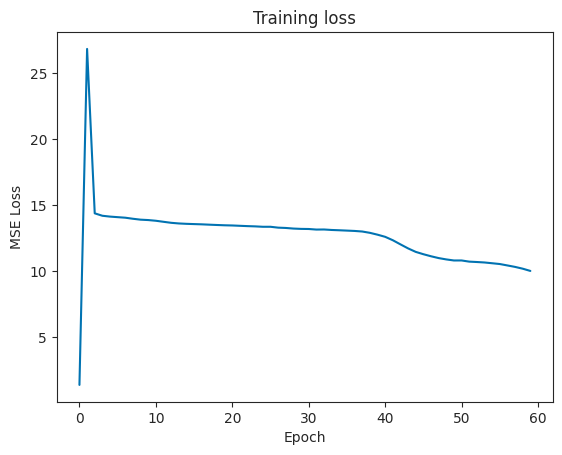

In [79]:


# final_mae = [[]]
# final_mse = [[]]
# # max_num_layers = 15
# # curr_num_node = 5
# # max_num_node = 50
# max_num_layers = 15
# curr_num_node = 5
# max_num_node = 50
# for ele in range(max_num_node):
#     for la in range(max_num_layers):
#         layers = [2]
#         for itr in range(la+1):
#             layers.append(ele+5)
        
#         layers.append(1)
#         model = PhysicsInformedNN(XT_u_tensor, v_tensor, XT_f_tensor, vf_tensor, layers)
#         model.train(10000)

#         pred = model.predict(XT_test)
        
#         aa = mean_absolute_error(test_v, pred)
#         curr_mae = [la+1, ele+5, aa]
#         final_mae.append(curr_mae)        
        
#         aa = mean_squared_error(test_v, pred)
#         curr_mse = [la+1, ele+5, aa]
#         final_mse.append(curr_mse)
        


layers = [2, 47, 47, 47, 1]
model = PhysicsInformedNN(XT_u_tensor, v_tensor, XT_f_tensor, vf_tensor, layers)
model.train(6000)
    
pred = model.predict(XT_test)

In [78]:
curr_nodes = 5
start_ind = 1
end_ind   = 16

for itr in range((53)):
    
    curr_test = final_mae[start_ind:end_ind]
    num_layer = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
    mse_now = []
    
    for i in range(len(curr_test)):        
        mse_now.append(curr_test[i][2])

    min_err = round(np.min(mse_now), 2)
    
    plt.plot(num_layer, mse_now)
    plt.title("Node at each layer={}, Epochs = 10,000, Min error ={}".format(curr_nodes, min_err))
    plt.xlabel("Number of layers")
    plt.ylabel("Mean absolute error")
    plt.savefig("jan_28_test_fig/figure_at_node_{}".format(curr_nodes))

    start_ind = end_ind
    end_ind   = end_ind + 15
    curr_nodes = curr_nodes + 1
    plt.clf()


    

NameError: name 'final_mae' is not defined

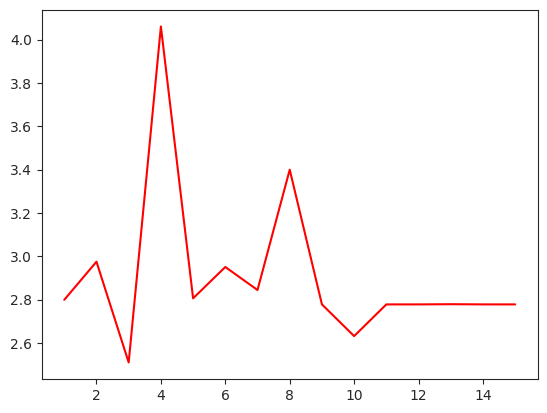

In [ ]:
# min_mse = 1234
# min_mse_ind = 0
# for i in range(len(final_mse)):
#     temp = final_mse[i]
#     if len(temp) !=0:
#         curr_mse = temp[2]
#         if curr_mse < min_mse:
#             min_mse = curr_mse
#             min_mse_ind = i


# print(min_mse)
# print(min_mse_ind)

x_axis = []
y_axis_mse = []
for i in range(len(final_mae)):
    temp = final_mae[i]
    if(len(temp) != 0):
        if(temp[1] == 47):
            x_axis.append(temp[0])
            y_axis_mse.append(temp[2])

plt.plot(x_axis, y_axis_mse, color="red")
plt.xlabel("Layers")
plt.
plt.show()

In [ ]:
nodes = [i for i in range(5, 55, 5)]
num_layer = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

perfomance = []

for i in range(len(final_mae)-61):
    if(i > 0):
        if final_mae[i][0] in num_layer:
            if final_mae[i][1]%5==0:
                perfomance.append(final_mae[i][2])

# perfomance = np.array(perfomance)
perfomance = np.array(perfomance).reshape(-1, 10)
perfomance.shape        

(10, 10)

In [260]:
# num_layer = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# for i in range(15):
#     if i in num_layer:
#         print("yes")


array([0, 1, 2, 3, 4])

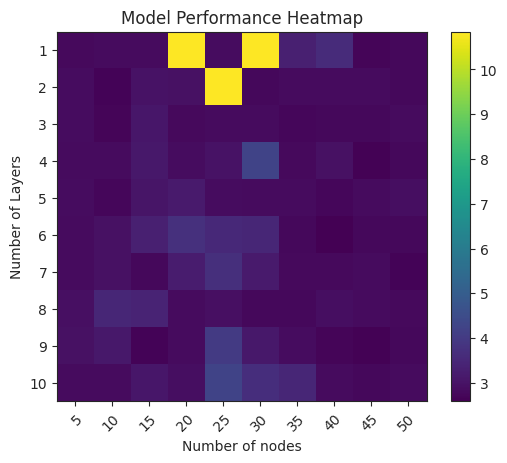

In [264]:
fig, ax = plt.subplots()
im = ax.imshow(perfomance, cmap='viridis')

ax.set_xticks(np.arange(len(nodes)))
ax.set_yticks(np.arange(len(num_layer)))
ax.set_xticklabels(nodes)
ax.set_yticklabels(num_layer)

fig.colorbar(im, ax=ax)
ax.set_title('Model Performance Heatmap')
ax.set_xlabel('Number of nodes')
ax.set_ylabel("Number of Layers")

# Rotate the x axis labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Show the plot
plt.show()

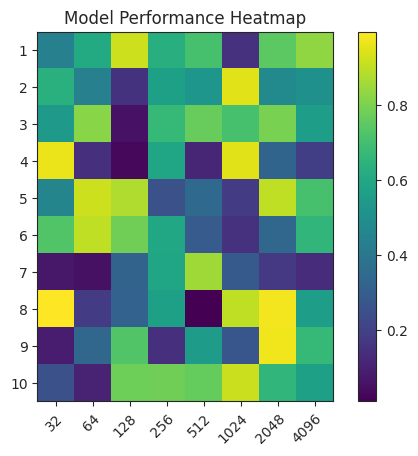

In [199]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data for performance metric
performance = np.random.rand(10, 8)

# Define the number of nodes and layers
nodes = [32, 64, 128, 256, 512, 1024, 2048, 4096]
layers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Plot the heatmap using imshow
fig, ax = plt.subplots()
im = ax.imshow(performance, cmap='viridis')

# Set x and y axis labels
ax.set_xticks(np.arange(len(nodes)))
ax.set_yticks(np.arange(len(layers)))
ax.set_xticklabels(nodes)
ax.set_yticklabels(layers)

# Add colorbar and title
fig.colorbar(im, ax=ax)
ax.set_title('Model Performance Heatmap')

# Rotate the x axis labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Show the plot
plt.show()


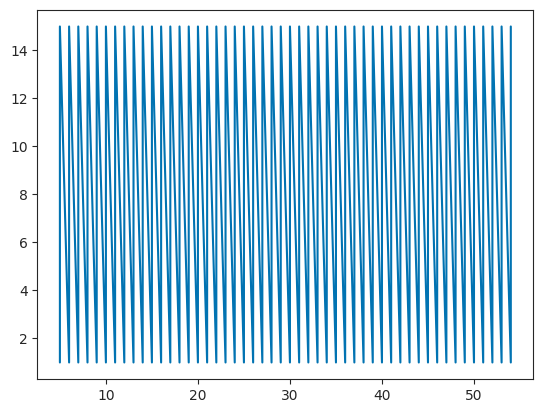

In [103]:
lay = []
nodes = []
error_mse = []
for i in range(len(final_mse)):
    temp = final_mse[i]
    if len(temp) !=0:
        lay.append(temp[0])
        nodes.append(temp[1])
        error_mse.append(temp[2])
    

plt.plot(nodes, lay)


In [85]:
# mse_w_nodes = []
# mae_w_nodes = []

# nodes = [i for i in range(10, 2001, 5)]

# for ele in nodes:
#     print("Current number of nodes: {}".format(ele))
#     layers = [2, ele, 1]
#     model = PhysicsInformedNN(XT_u_tensor, v_tensor, XT_f_tensor, vf_tensor, layers)
#     model.train(15000)
    
#     pred = model.predict(XT_test)

#     aa = mean_absolute_error(test_v, pred)
#     mae_w_nodes.append(aa)
    
#     aa = mean_squared_error(test_v, pred)
#     mse_w_nodes.append(aa)
    
#     # for layer in model.children():
#     #     if hasattr(layer, 'reset_parameters'):
#     #         layer.reset_parameters()

# plt.plot(nodes, mae_w_nodes,color='blue')
# plt.plot(nodes, mse_w_nodes, color='red')
# plt.xlabel("Number of nodes")
# plt.ylabel("MSE and MAE")
x_tensor = np.linspace(0, 2.8, 280)
t_tensor = np.array(Day_Temp_only_sections.iloc[1])
t_tensor = (t_tensor*5) / max_val
XT_test  = torch.vstack([torch.tensor(x_tensor), torch.tensor(t_tensor)])
XT_test  = XT_test.T
XT_test.shape

pred = model.predict(XT_test)

Text(0, 0.5, 'Speed in m/s')

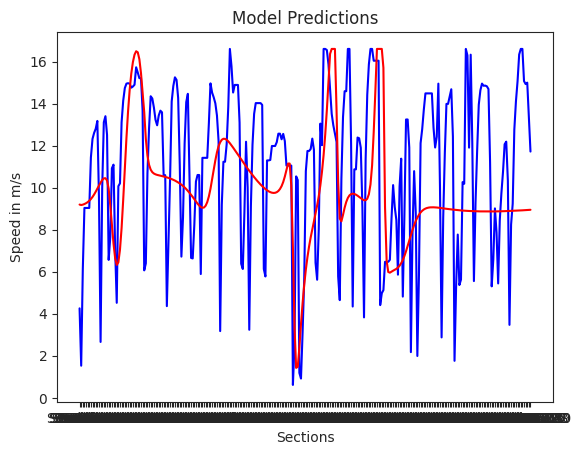

In [86]:
plt.plot(test_v2,color='blue')
plt.plot(pred,color='red')
plt.title("Model Predictions")
plt.xlabel("Sections")
plt.ylabel("Speed in m/s")

In [87]:

aa = mean_absolute_error(test_v, pred)
print(aa)
aa = mean_squared_error(test_v, pred)
print(aa)

aa = mean_absolute_percentage_error(pred, test_v)
print(aa)


2.9802802708556944
13.776679509008838
0.36348744417201123


In [174]:
temp = min(mae_w_nodes)
for ele in range(len(mae_w_nodes)):
    if mae_w_nodes[ele] == temp:
        print(ele)
        break

nodes[275]

NameError: name 'mae_w_nodes' is not defined

In [ ]:
# model_save = torch.load('Best_weights_pde.pt')
# def predict_saved(self, X):
        
#     x = X[:, 0].unsqueeze(-1).to(torch.float32)
#     t = X[:, 1].unsqueeze(-1).to(torch.float32)
    
#     model_save.eval()
#     u = self.net_u(x, t)
#     f = self.net_f(x, t)
#     u = u.detach().cpu().numpy()
#     f = f.detach().cpu().numpy()
#     return u

pred = model.predict(XT_test)

In [ ]:
list(zip(pred, test_v36))

In [ ]:
check = pred

In [ ]:
plt.plot(test_v)
plt.plot(pred)
plt.xlabel("Section")
plt.ylabel("Speed")
plt.show()

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

aa = mean_absolute_error(test_v36, pred)
print(aa)
aa = mean_squared_error(test_v36, pred)
print(aa)

aa = mean_absolute_percentage_error(pred, test_v2)
print(aa)


# aa = mean_absolute_error(a1, a2)
# print(aa)
# aa = mean_squared_error(a1, a2)
# print(aa)

# aa = mean_absolute_percentage_error(a1, a2)
# print(aa)


In [ ]:
suu = mean_absolute_error(check, pred)
suu

In [ ]:
# torch.save(model.save_model().state_dict(), 'PDE_with_initial_con.pt')

In [ ]:
# # the physics-guided neural network
# def divider2():
#     model = torch.load('Best_weights_pde.pt')
#     model.eval()
#     return model
# class PhysicsInformedNN2():
#     def __init__(self, X_u, u_u, X_f, u_f):
        
#         torch.manual_seed(1234)
        
#         self.x_u = X_u[:, 0].unsqueeze(-1).to(torch.float32)
#         self.t_u = X_u[:, 1].unsqueeze(-1).to(torch.float32)
#         self.u_u = u_u.unsqueeze(-1)


#         self.x_f = X_f[:, 0].unsqueeze(-1).to(torch.float32)
#         self.t_f = X_f[:, 1].unsqueeze(-1).to(torch.float32)
#         self.u_f = u_f.unsqueeze(-1)
        
#         self.x_u = torch.cat((self.x_u, self.x_f), 0)
#         self.t_u = torch.cat((self.t_u, self.t_f), 0)
#         self.u_u = torch.cat((self.u_u, self.u_f), 0) 

#         self.dnn = divider2()
        
#         self.optimizer = torch.optim.LBFGS(
#             self.dnn.parameters(), 
#             lr=1.0, 
#             max_iter=50000, 
#             max_eval=50000, 
#             history_size=50,
#             tolerance_grad=1e-5, 
#             tolerance_change=1.0 * np.finfo(float).eps,
#             line_search_fn="strong_wolfe" 

#         )
#         self.optimizer_Adam = torch.optim.Adam(self.dnn.parameters(), lr = 1e-3, weight_decay= 0.01)
#         self.iter = 0
        
#     def net_u(self, x, t):
#         x = x.requires_grad_()
#         t = t.requires_grad_()
#         u = self.dnn(torch.cat([x, t], dim=1))
#         return u
    
#     def net_f(self, x, t):
#         """ The pytorch autograd version of calculating residual """
#         # lambda_1 = self.lambda_1        
#         # lambda_2 = torch.exp(self.lambda_2)

#         #return the approximated u given x and t
#         V_f = 16.6
#         u = self.net_u(x, t)

#         u_t = torch.autograd.grad(
#             u, t, 
#             grad_outputs=torch.ones_like(u),
#             retain_graph=True,
#             create_graph=True
#         )[0]
        
        
#         temp_u = ((u*u/2)*(1/2 + torch.log(u/V_f)))
#         u_x = torch.autograd.grad(
#             temp_u, x, 
#             grad_outputs=torch.ones_like(temp_u),
#             retain_graph=True,
#             create_graph=True
#         )[0]
        
#         f = u_t + u_x

#         return f
    


#     # def loss_func(self):
#     #     alpha  = 0
#     #     u_pred = self.net_u(self.x, self.t)
#     #     f_pred = self.net_f(self.x, self.t)
#     #     loss = torch.mean((self.u - u_pred) ** 2) + alpha*torch.mean(f_pred ** 2)
#     #     self.optimizer.zero_grad()
#     #     loss.backward()
        
#     #     self.iter += 1
#     #     if self.iter % 100 == 0:
#     #         print(
#     #             'Loss: %e' % 
#     #             (
#     #                 loss.item(), 
                   
#     #             )
#     #         )
#     #     return loss





#     def train(self, nIter):

#         min_loss = 1e6

#         #self.dnn.train()
#         for epoch in range(nIter):
            
#             u_pred = self.net_u(self.x_u, self.t_u)            
#             #f_pred = self.net_f(self.x_f, self.t_f)

#             #pde_loss = torch.mean(f_pred ** 2)    
#             mse_loss = torch.mean((self.u_u - u_pred) ** 2)
            
#             loss =   mse_loss #+ pde_loss
            
#             self.optimizer_Adam.zero_grad()
#             loss.backward()
#             self.optimizer_Adam.step()

#             if loss < min_loss:
#                 min_loss = loss
#                 torch.save(self.dnn, 'Best_weights.pt')
            
#             if epoch % 100 == 0:
                
#                 print(
#                     'It: %d, Loss: %.3e ' % 
#                     (
#                         epoch, 
#                         mse_loss.item()
                       
#                     )
#                 )
            
#         # self.optimizer.step(self.loss_func)
        
    
#     def predict(self, X):
        
#         x = X[:, 0].unsqueeze(-1).to(torch.float32)
#         t = X[:, 1].unsqueeze(-1).to(torch.float32)
       
#         self.dnn.eval()
#         u = self.net_u(x, t)
#         f = self.net_f(x, t)
#         u = u.detach().cpu().numpy()
#         f = f.detach().cpu().numpy()
#         return u

#     def save_model2(self):
#         final = self.dnn
#         return final

In [ ]:
# model2 = PhysicsInformedNN2(XT_u_tensor, v_tensor, XT_f_tensor, vf_tensor)
